In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "friuli venezia giulia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,31.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
1,2020-02-26T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
2,2020-02-27T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,27.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
3,2020-02-28T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,28.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
4,2020-02-29T17:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,20.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2020-11-17T17:00:00,6,Friuli Venezia Giulia,454,44,498,9923,10421,366,536,...,10.0,5926.0,1140.0,322.0,8.84,4.78,9.04,47.02,-6.38,5.331
267,2020-11-18T17:00:00,6,Friuli Venezia Giulia,470,49,519,10235,10754,333,796,...,11.0,7301.0,1746.0,312.0,9.44,4.83,10.90,45.59,11.36,7.638
268,2020-11-19T17:00:00,6,Friuli Venezia Giulia,485,48,533,11112,11645,891,1197,...,13.0,6680.0,1930.0,877.0,9.01,4.58,17.92,62.02,-2.04,11.131
269,2020-11-20T17:00:00,6,Friuli Venezia Giulia,505,54,559,11616,12175,530,1018,...,28.0,7522.0,2086.0,504.0,9.66,4.59,13.53,48.80,12.50,8.742


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 21, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1043
Nuovi tamponi: 7258.0
Percentuale nuovi positivi/nuovi tamponi: 14.399999999999999 %
Nuovi guariti: 436.0
Nuovi deceduti: 25.0
Variazione positivi ricoverati con sintomi: 4.0
Variazione positivi in terapia intensiva: 1.0
Variazione positivi in isolamento dimiciliare: 577.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 21, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-22T17:00:00,6,Friuli Venezia Giulia,21,5,26,677,703,7,14,...,0.0,2296.0,805.0,6.0,19.23,3.70,0.61,1.74,0.00,2.011
1,2020-09-23T17:00:00,6,Friuli Venezia Giulia,16,6,22,688,710,7,57,...,0.0,4770.0,1592.0,11.0,27.27,3.10,1.19,3.58,20.00,8.108
2,2020-09-24T17:00:00,6,Friuli Venezia Giulia,21,6,27,680,707,-3,28,...,0.0,3034.0,1151.0,-8.0,22.22,3.82,0.92,2.43,0.00,3.944
3,2020-09-25T17:00:00,6,Friuli Venezia Giulia,17,6,23,690,713,6,37,...,0.0,3899.0,1260.0,10.0,26.09,3.23,0.95,2.94,0.00,5.233
4,2020-09-26T17:00:00,6,Friuli Venezia Giulia,18,6,24,694,718,5,54,...,0.0,4475.0,1429.0,4.0,25.00,3.34,1.21,3.78,0.00,7.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-17T17:00:00,6,Friuli Venezia Giulia,454,44,498,9923,10421,366,536,...,10.0,5926.0,1140.0,322.0,8.84,4.78,9.04,47.02,-6.38,5.331
57,2020-11-18T17:00:00,6,Friuli Venezia Giulia,470,49,519,10235,10754,333,796,...,11.0,7301.0,1746.0,312.0,9.44,4.83,10.90,45.59,11.36,7.638
58,2020-11-19T17:00:00,6,Friuli Venezia Giulia,485,48,533,11112,11645,891,1197,...,13.0,6680.0,1930.0,877.0,9.01,4.58,17.92,62.02,-2.04,11.131
59,2020-11-20T17:00:00,6,Friuli Venezia Giulia,505,54,559,11616,12175,530,1018,...,28.0,7522.0,2086.0,504.0,9.66,4.59,13.53,48.80,12.50,8.742


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

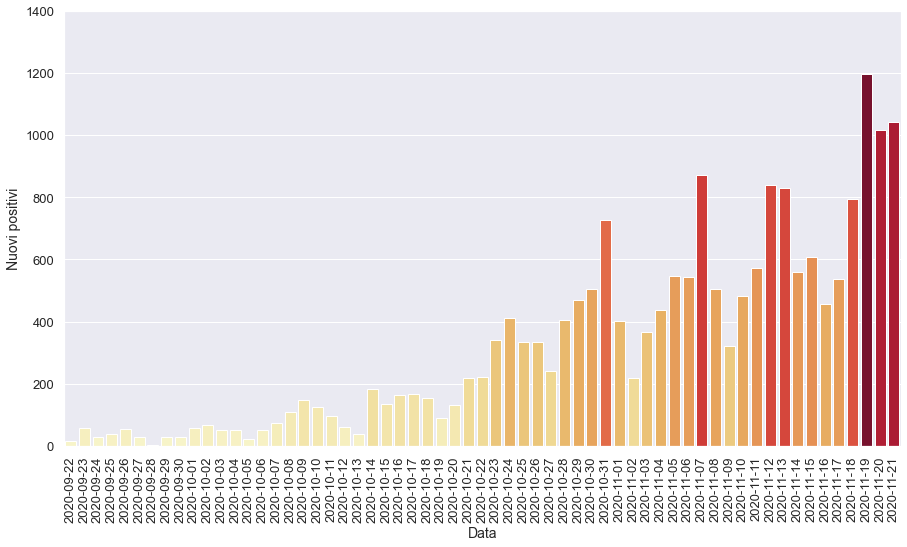

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

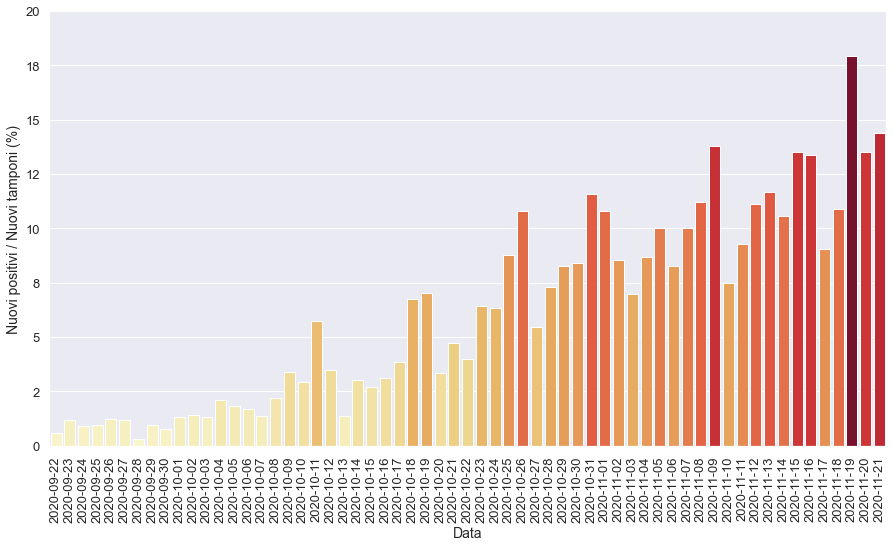

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

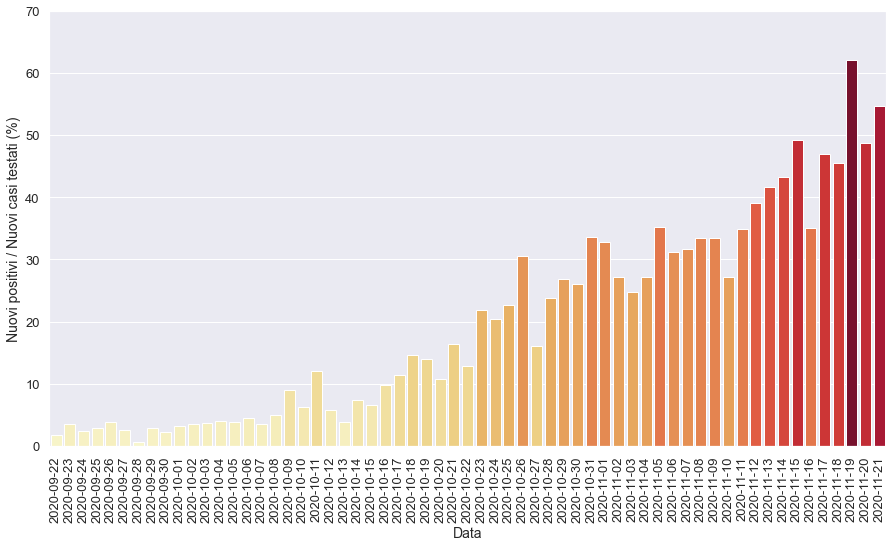

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

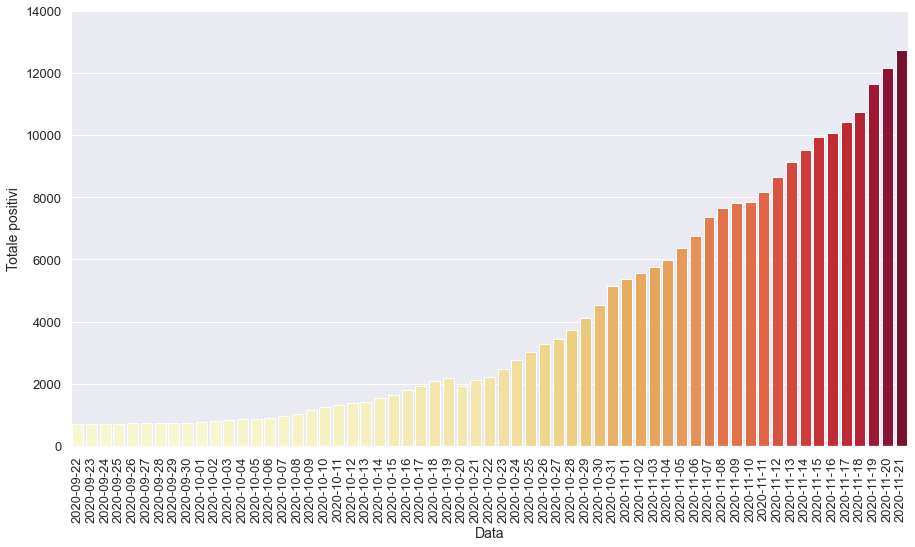

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

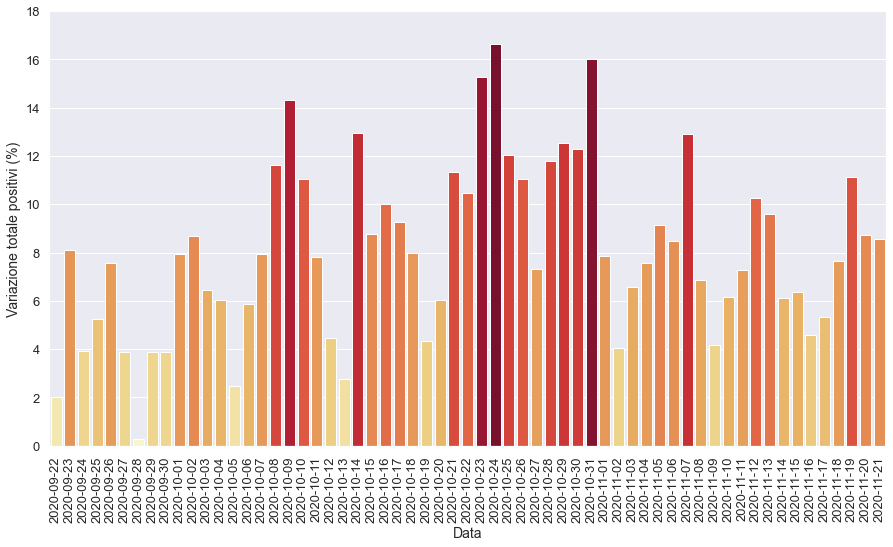

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

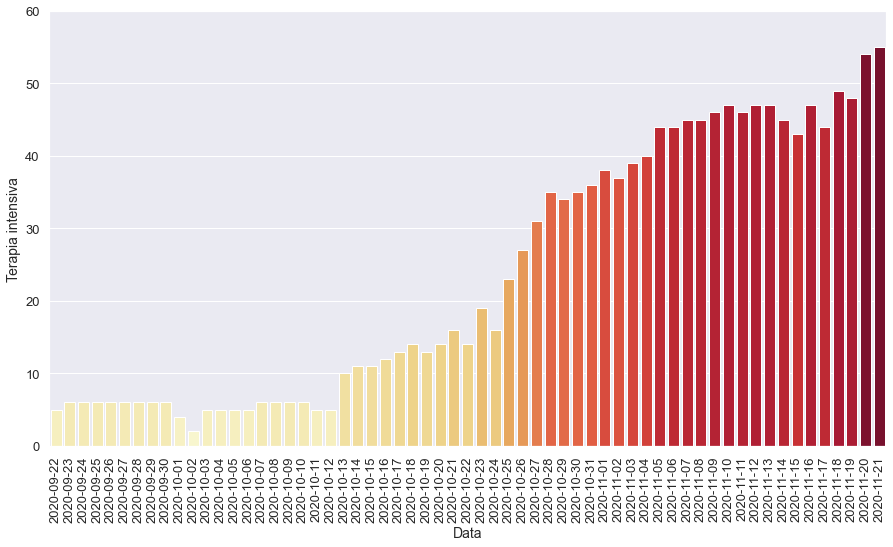

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

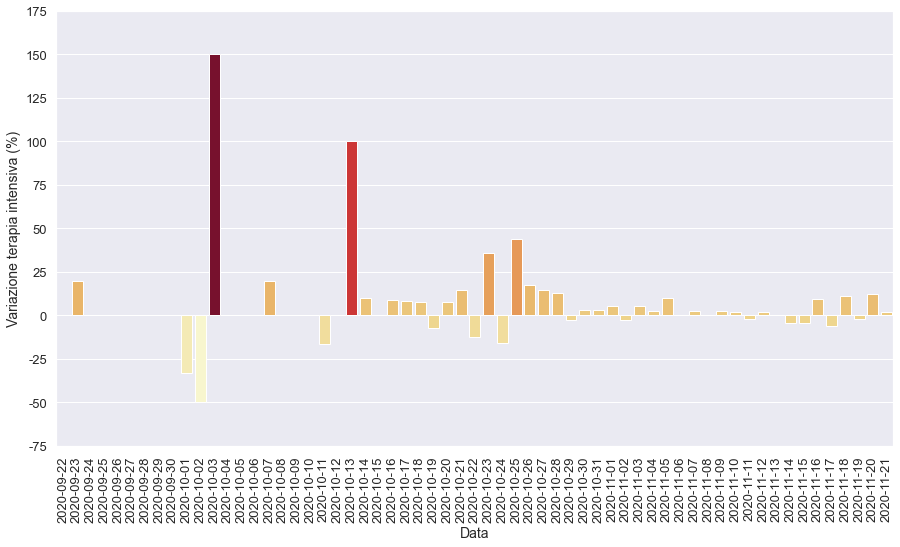

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

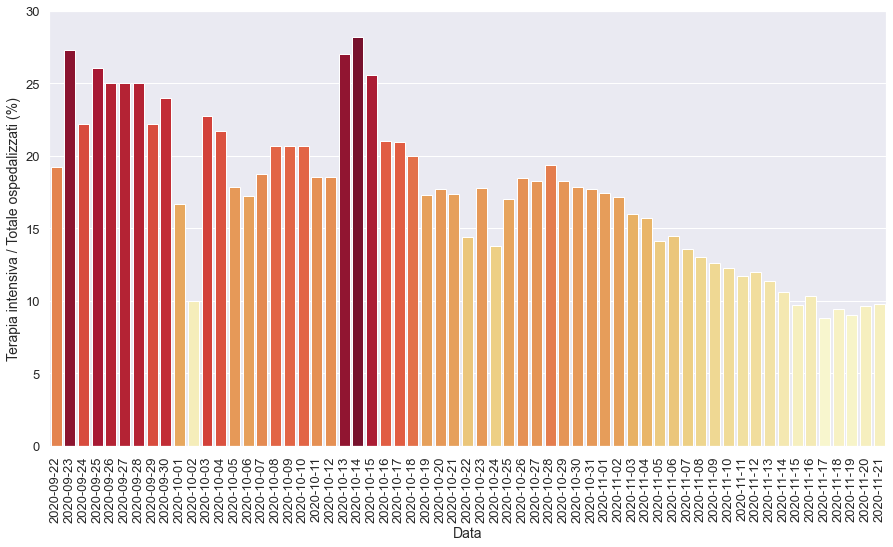

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

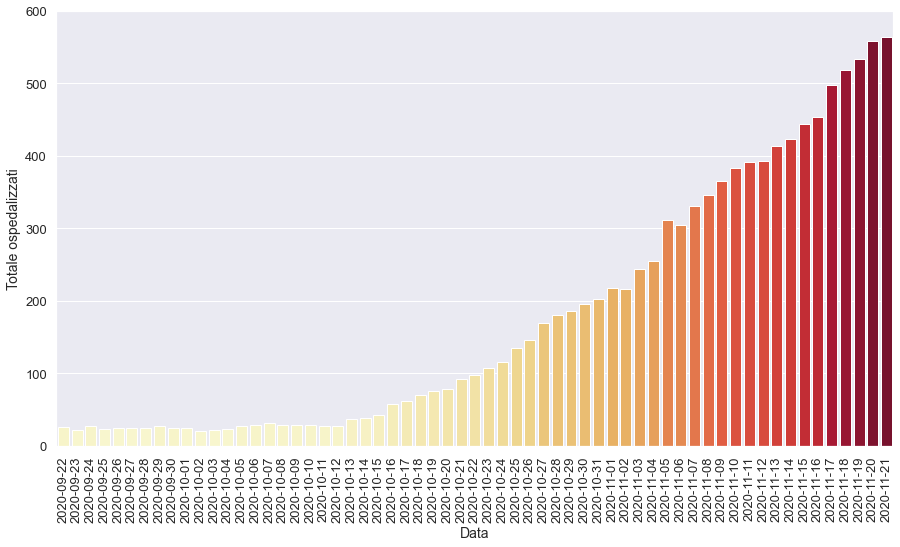

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

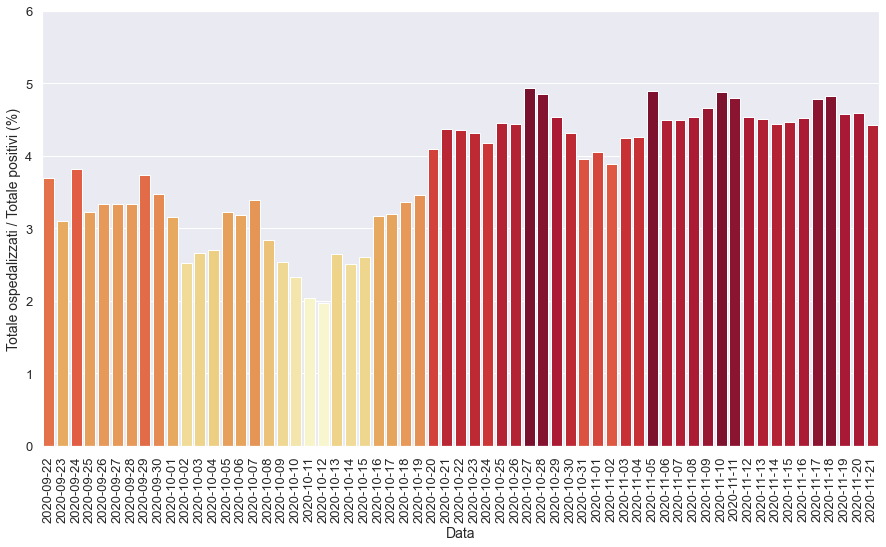

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

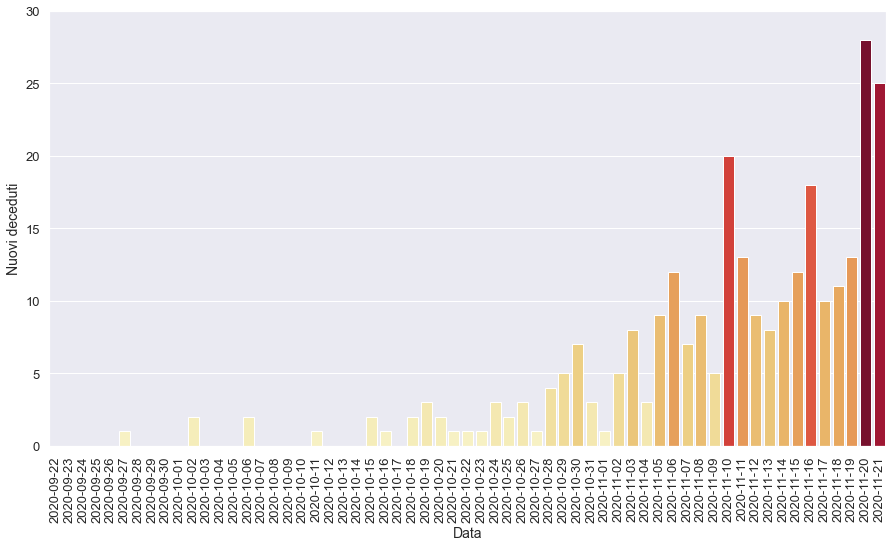

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

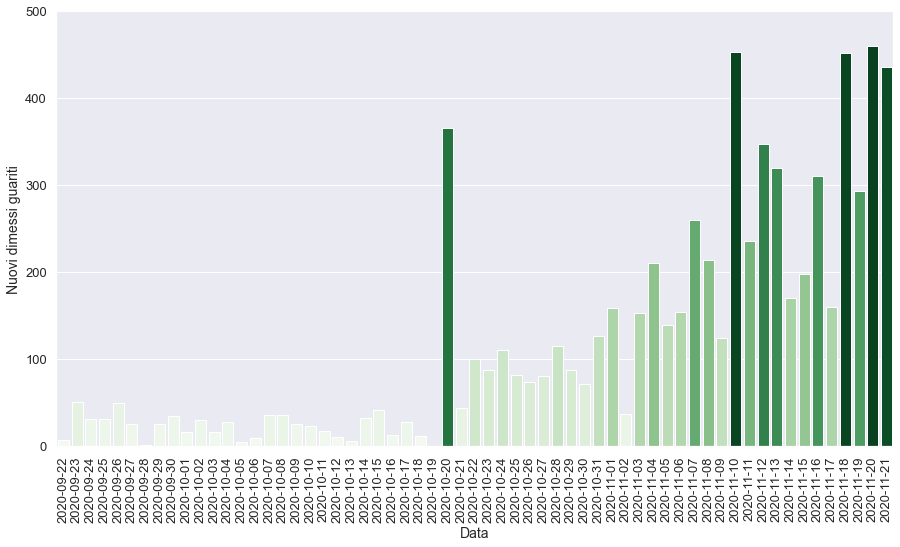

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-22T17:00:00,6,Friuli Venezia Giulia,83,14,97,2128,2225,119,220,...,1.0,5510.0,1715.0,114.0,14.43,4.36,3.99,12.83,-12.50,10.446
1,2020-10-23T17:00:00,6,Friuli Venezia Giulia,88,19,107,2370,2477,252,340,...,1.0,5301.0,1559.0,242.0,17.76,4.32,6.41,21.81,35.71,15.281
2,2020-10-24T17:00:00,6,Friuli Venezia Giulia,100,16,116,2660,2776,299,412,...,3.0,6521.0,2011.0,290.0,13.79,4.18,6.32,20.49,-15.79,16.633
3,2020-10-25T17:00:00,6,Friuli Venezia Giulia,112,23,135,2892,3027,251,334,...,2.0,3800.0,1471.0,232.0,17.04,4.46,8.79,22.71,43.75,12.032
4,2020-10-26T17:00:00,6,Friuli Venezia Giulia,119,27,146,3139,3285,258,334,...,3.0,3087.0,1093.0,247.0,18.49,4.44,10.82,30.56,17.39,11.034
5,2020-10-27T17:00:00,6,Friuli Venezia Giulia,139,31,170,3275,3445,160,241,...,1.0,4422.0,1507.0,136.0,18.24,4.93,5.45,15.99,14.81,7.336
6,2020-10-28T17:00:00,6,Friuli Venezia Giulia,146,35,181,3551,3732,287,406,...,4.0,5573.0,1705.0,276.0,19.34,4.85,7.29,23.81,12.90,11.785
7,2020-10-29T17:00:00,6,Friuli Venezia Giulia,152,34,186,3922,4108,376,468,...,5.0,5659.0,1746.0,371.0,18.28,4.53,8.27,26.80,-2.86,12.540
8,2020-10-30T17:00:00,6,Friuli Venezia Giulia,161,35,196,4339,4535,427,505,...,7.0,6017.0,1934.0,417.0,17.86,4.32,8.39,26.11,2.94,12.293
9,2020-10-31T17:00:00,6,Friuli Venezia Giulia,167,36,203,4929,5132,597,726,...,3.0,6262.0,2163.0,590.0,17.73,3.96,11.59,33.56,2.86,16.009


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

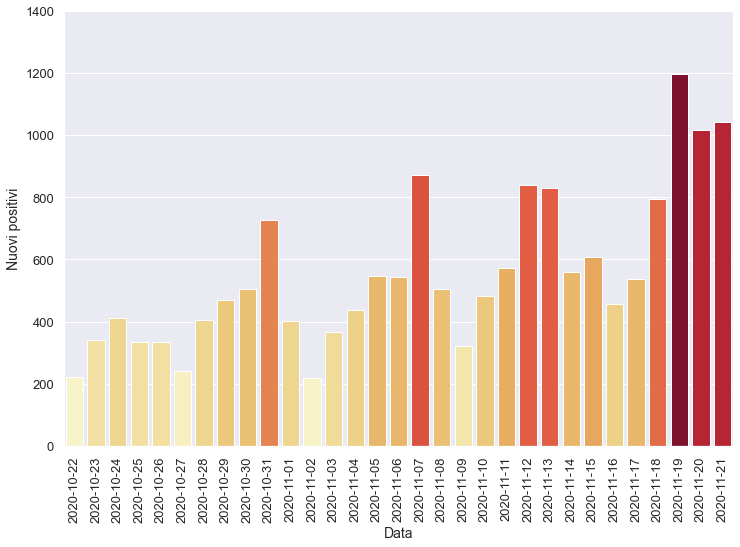

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

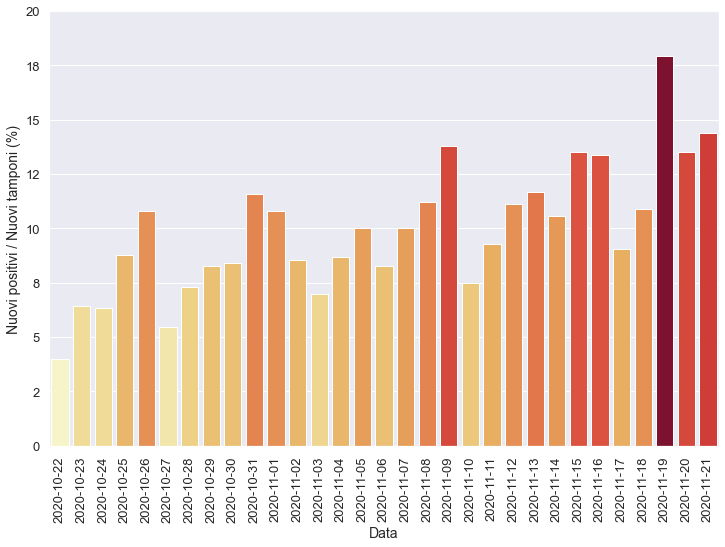

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

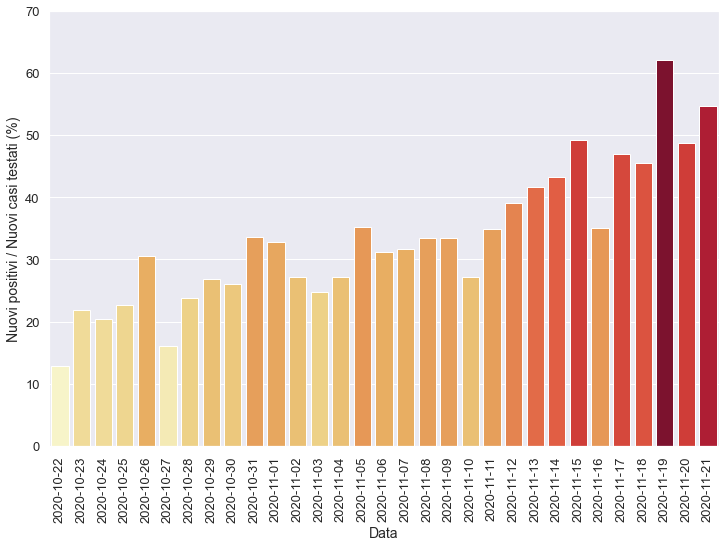

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

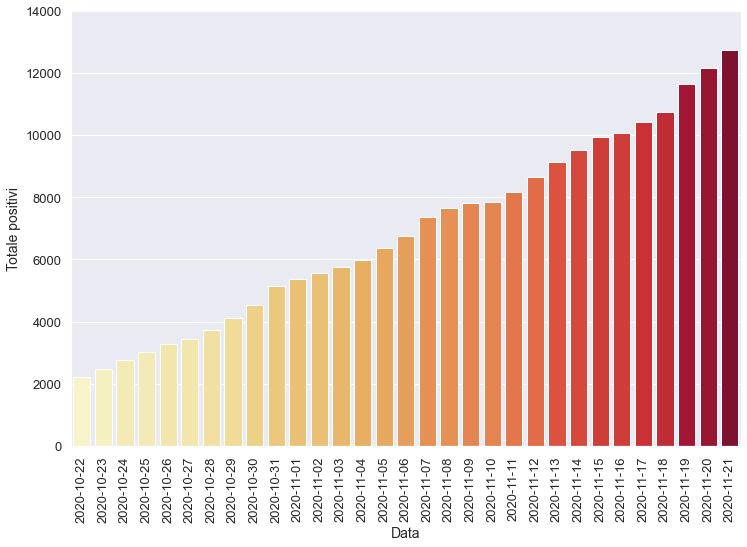

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

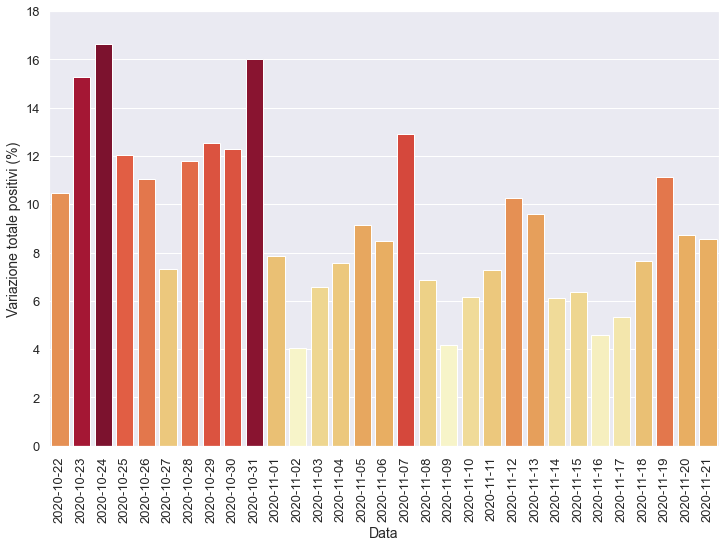

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

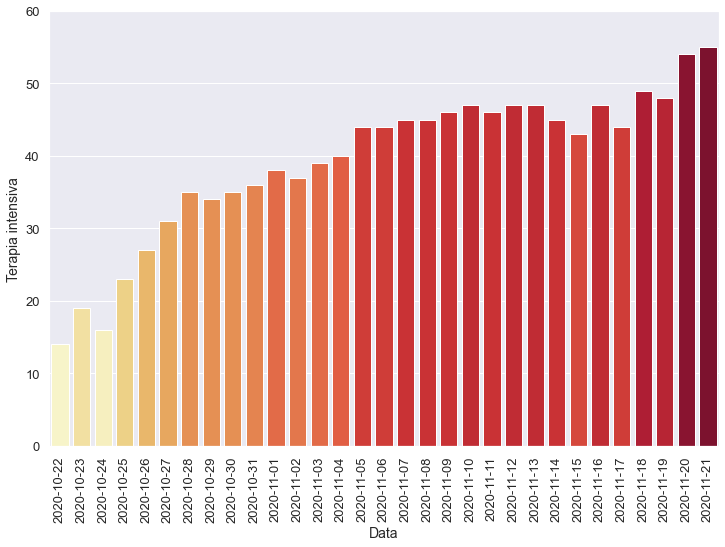

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

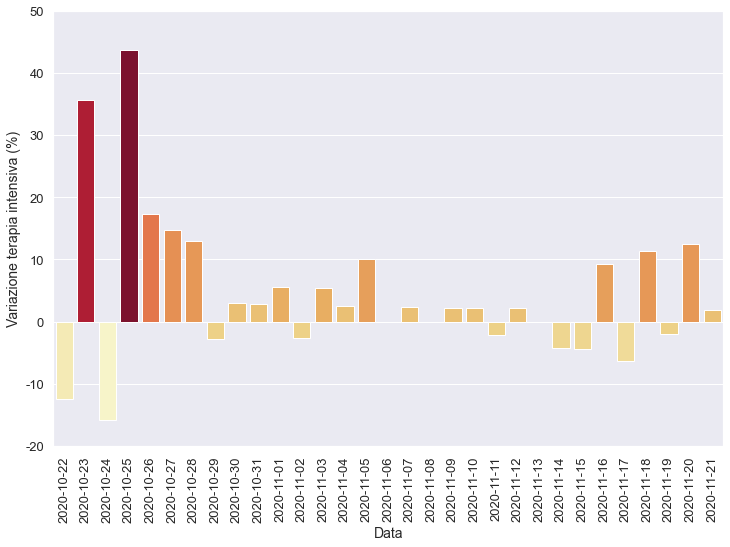

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

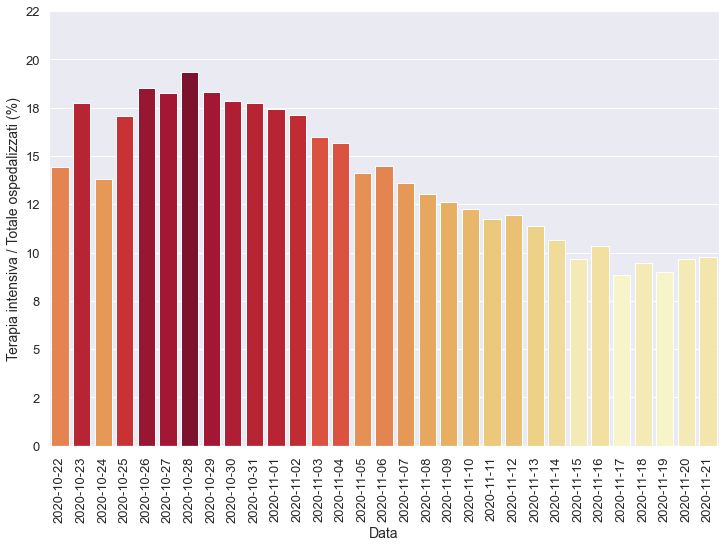

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

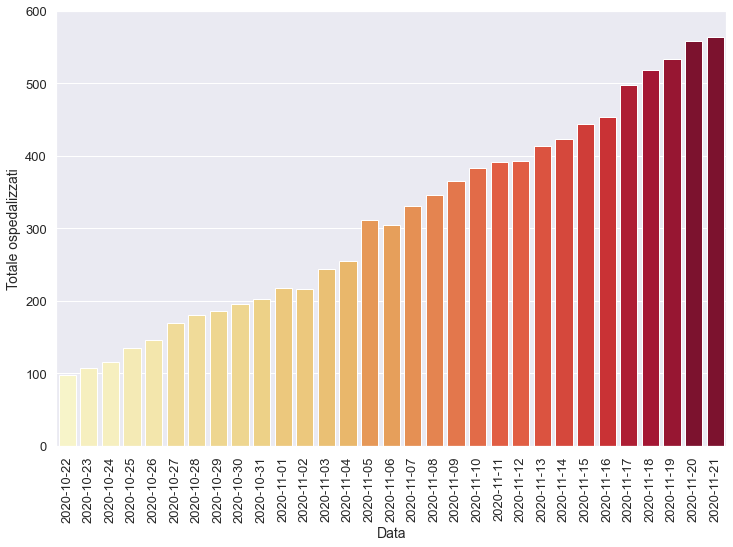

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

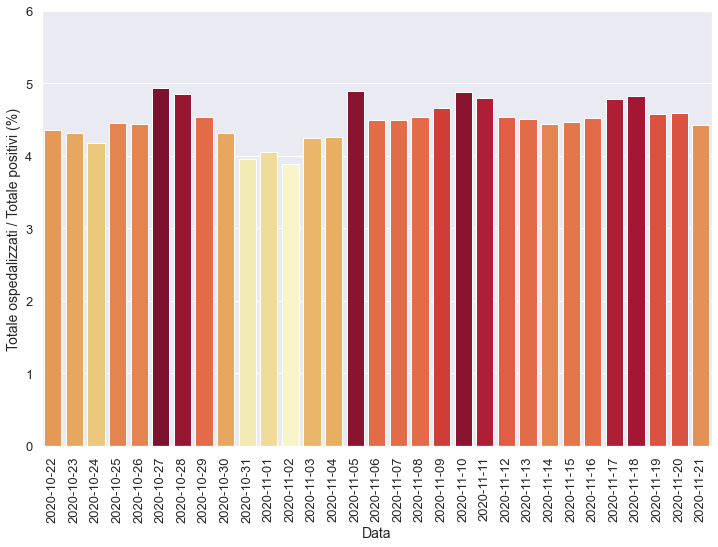

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

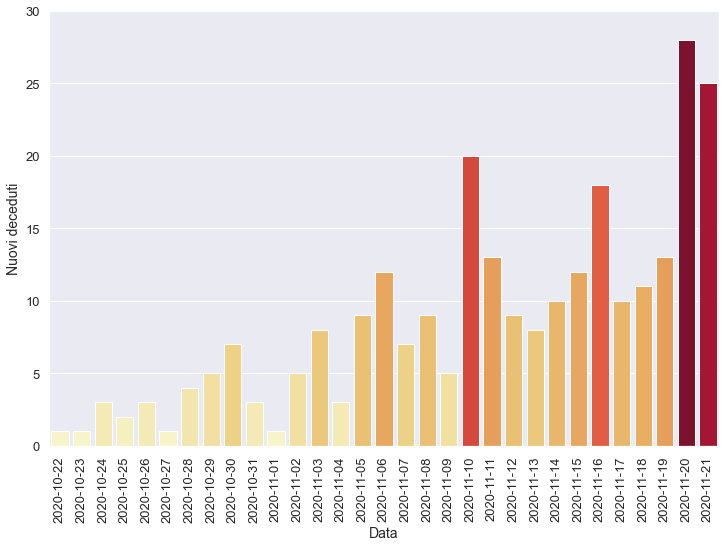

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

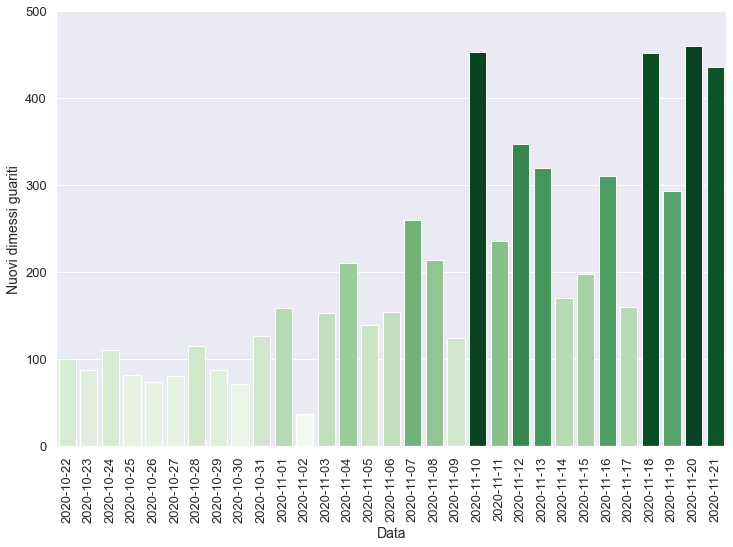

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-14T17:00:00,6,Friuli Venezia Giulia,378,45,423,9106,9529,378,558,...,10.0,5271.0,1290.0,368.0,10.64,4.44,10.59,43.26,-4.26,6.098
1,2020-11-15T17:00:00,6,Friuli Venezia Giulia,401,43,444,9483,9927,398,608,...,12.0,4505.0,1237.0,377.0,9.68,4.47,13.50,49.15,-4.44,6.381
2,2020-11-16T17:00:00,6,Friuli Venezia Giulia,407,47,454,9601,10055,128,456,...,18.0,3411.0,1298.0,118.0,10.35,4.52,13.37,35.13,9.30,4.594
3,2020-11-17T17:00:00,6,Friuli Venezia Giulia,454,44,498,9923,10421,366,536,...,10.0,5926.0,1140.0,322.0,8.84,4.78,9.04,47.02,-6.38,5.331
4,2020-11-18T17:00:00,6,Friuli Venezia Giulia,470,49,519,10235,10754,333,796,...,11.0,7301.0,1746.0,312.0,9.44,4.83,10.90,45.59,11.36,7.638
5,2020-11-19T17:00:00,6,Friuli Venezia Giulia,485,48,533,11112,11645,891,1197,...,13.0,6680.0,1930.0,877.0,9.01,4.58,17.92,62.02,-2.04,11.131
6,2020-11-20T17:00:00,6,Friuli Venezia Giulia,505,54,559,11616,12175,530,1018,...,28.0,7522.0,2086.0,504.0,9.66,4.59,13.53,48.80,12.50,8.742
7,2020-11-21T17:00:00,6,Friuli Venezia Giulia,509,55,564,12193,12757,582,1043,...,25.0,7258.0,1908.0,577.0,9.75,4.42,14.37,54.66,1.85,8.567


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

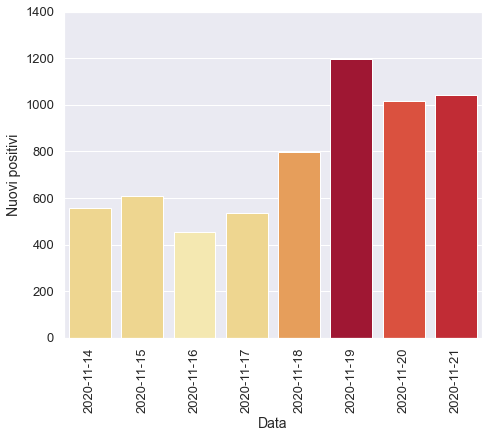

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

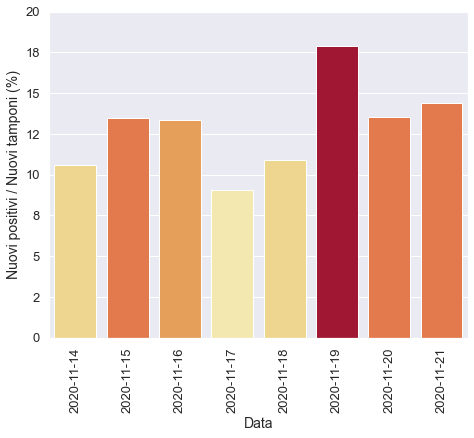

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

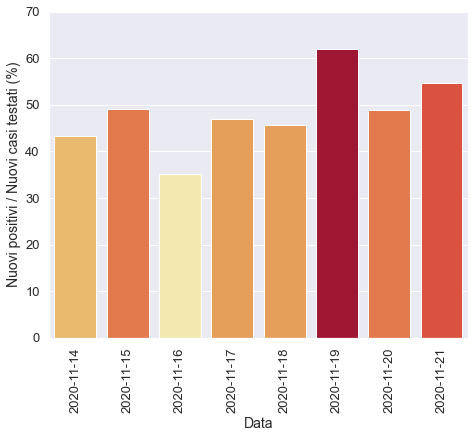

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

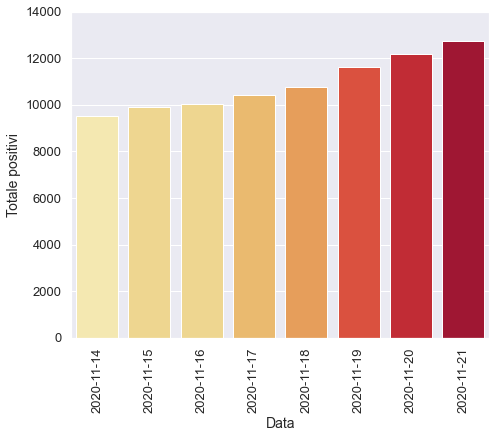

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

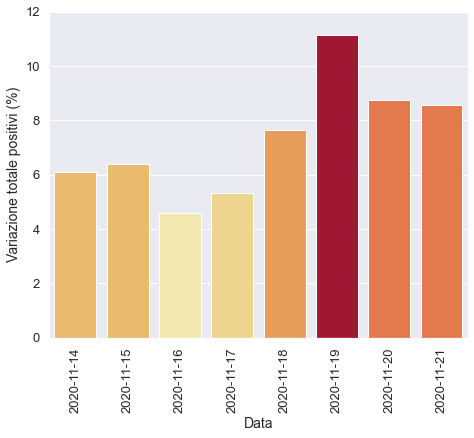

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

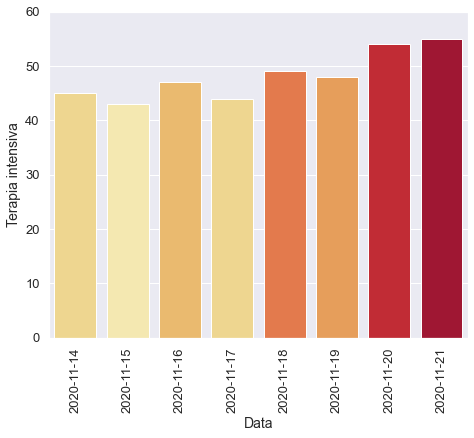

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

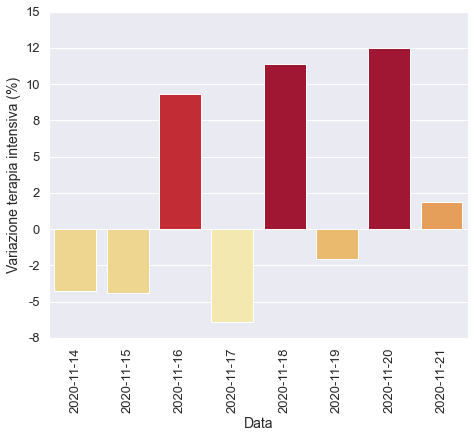

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

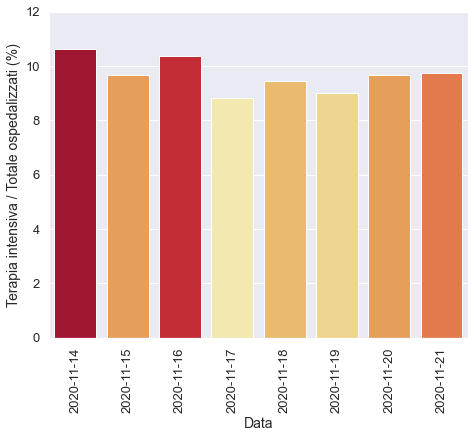

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

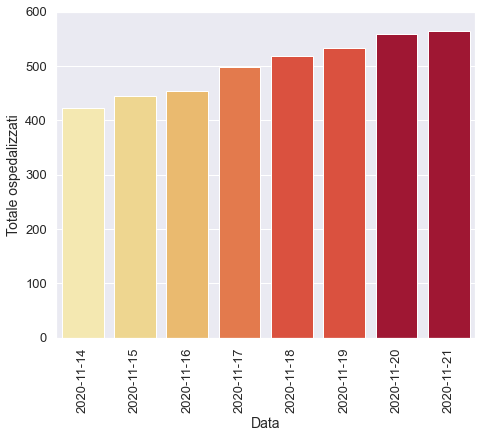

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

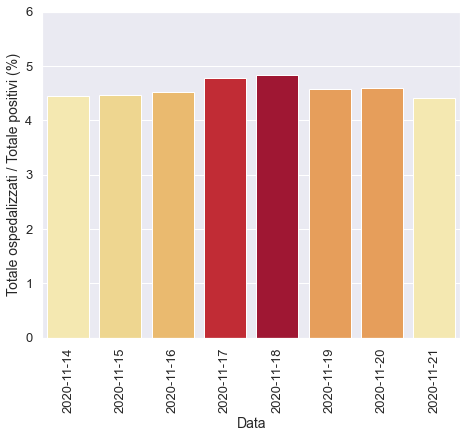

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

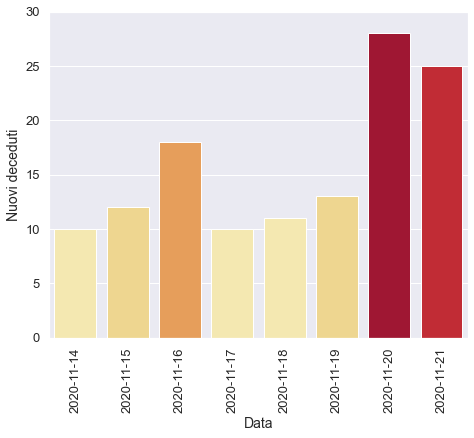

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

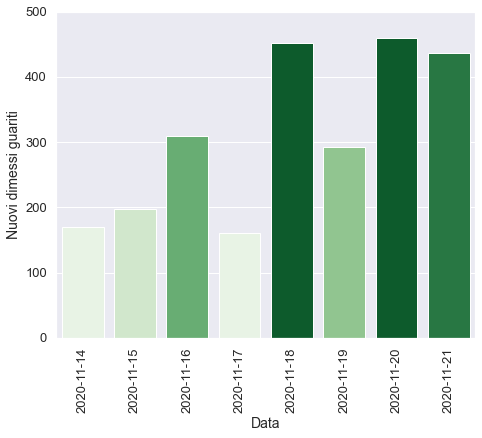

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)